<a href="https://colab.research.google.com/github/abjaffrey/abjaffrey/blob/main/Copy_of_Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [5]:
# importing numpy and pands library 
import numpy as pd
import pandas as pd

In [6]:
# importing matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# reading the csv file from drive
df=pd.read_csv('/content/drive/MyDrive/Copy of Global Terrorism Data.csv', encoding = "ISO-8859-1", engine='python')

In [9]:
# printing  the head of csv to lookup at the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
# Keeping required columns and removing unwanted columns
columns_required = ['iyear','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','ransomamt','gname','nkill']

In [11]:
# Creating new df required for analysis
new_df = df[columns_required].copy()

In [12]:
new_df.head()

,iyear,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,ransomamt,gname,nkill
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,NaN,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),800000.0,23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,NaN,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Unknown,NaN


In [13]:
# Renaming the columns
new_df.rename(columns = {'iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','ransomamt':'ransom','gname':'gang_name','nkill':'people_killed'}, inplace = True)

In [14]:
new_df.isnull().sum()

year                  0
country               0
region                0
city                434
attack_type           0
target_type           0
ransom           180341
gang_name             0
people_killed     10313
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           181691 non-null  int64  
 1   country        181691 non-null  object 
 2   region         181691 non-null  object 
 3   city           181257 non-null  object 
 4   attack_type    181691 non-null  object 
 5   target_type    181691 non-null  object 
 6   ransom         1350 non-null    float64
 7   gang_name      181691 non-null  object 
 8   people_killed  171378 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ MB


In [16]:
# Filling NaN values of ransom and people killed

new_df['people_killed'] = new_df['people_killed'].fillna(0)

mean = new_df['ransom'].mean()
new_df['ransom'].fillna(value=mean, inplace=True)

## ***italicized text***
TASKS TO DO
1. RENAME THE COLUMN 
2.REMOVING THE NOT NEEDED COLUMN 
3.PLOT CHART BY NUMBER OF CASUALITITES EACH YEAR WISE(1971-2017)
4.NUMBER OF ATTACKS COUNTRY WISE
5.REGION WISE TERRORIST ACTIVITIES
6.COIUNTRY WISE CASUALITIES TILL NOW
7.TOTAL ATTACK BY TYPE OF ATTACK 
8.CITY WISE DEATHS 
9.TERRORIST ACTIVIES BY GROUP LIKE TALIBAN ETC
10.TARGET TYPE GOVT OR PUBLIC ATTACK
11.RANSOM COLLECTED COUNTRY WISE


In [17]:
# storing data for year wise killed
year_killed_df = new_df[['year','people_killed']]

In [18]:
# Grouping the data by year wise killed and applying sum aggregate
year_killed_df = year_killed_df.groupby('year')['people_killed'].sum()

In [19]:
year_killed_df.head()

year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: people_killed, dtype: float64

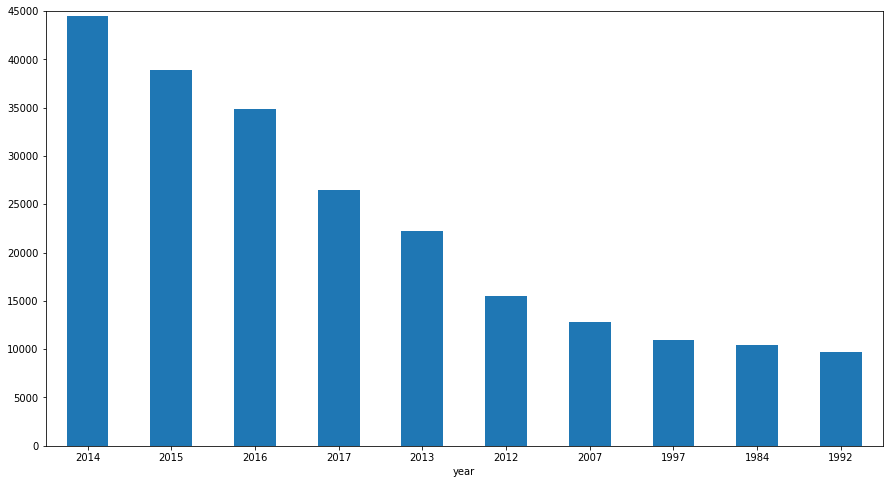

In [50]:
# Number of casualties each year
#year_killed_df.plot(kind='line')

new_df.groupby('year')['people_killed'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',rot=0,figsize=(15,8),ylim=(0,45000))

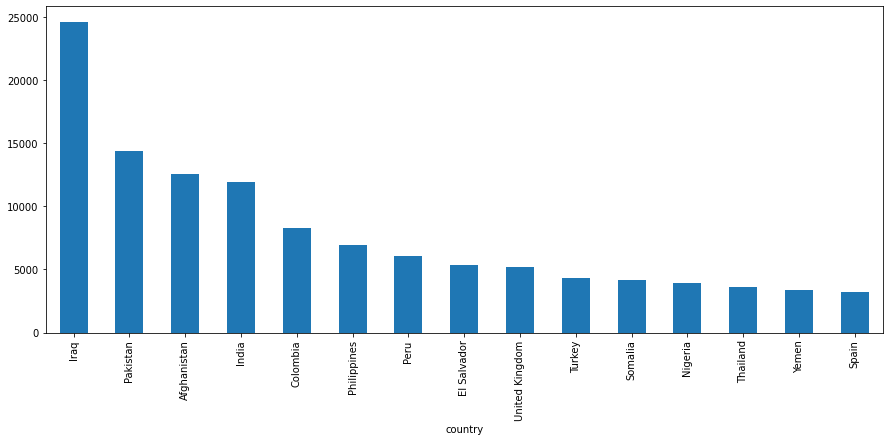

In [41]:
# Number of attacks country wise

new_df.groupby('country')['country'].count().sort_values(ascending=False)[0:15].plot.bar(figsize=(15,6))

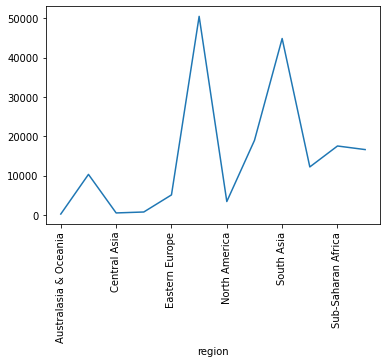

In [52]:
# Region wise terrorist activities

new_df.groupby('region')['region'].count().plot(rot=90)

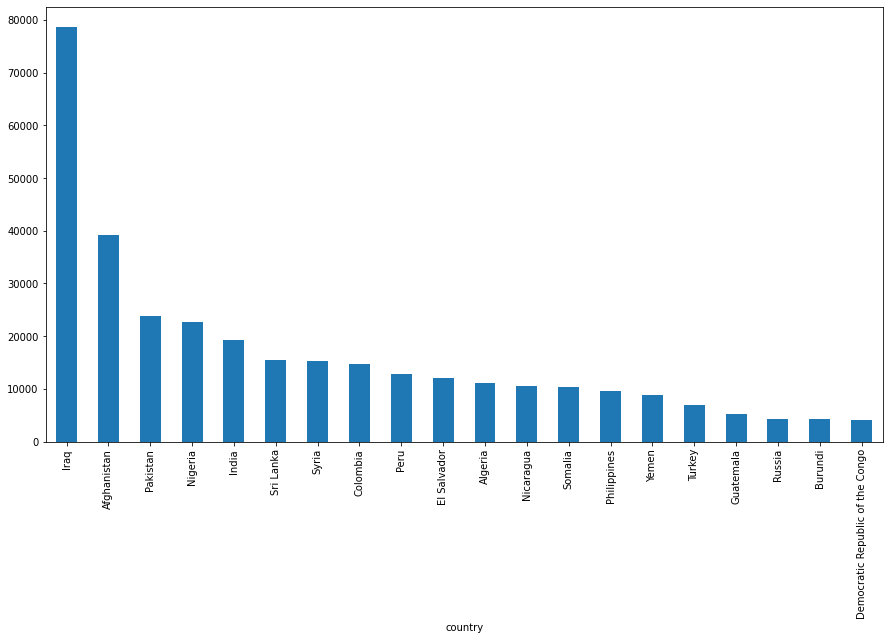

In [60]:
# Country wise casualties

new_df.groupby('country')['people_killed'].sum().sort_values(ascending=False)[0:20].plot.bar(figsize=(15,8))

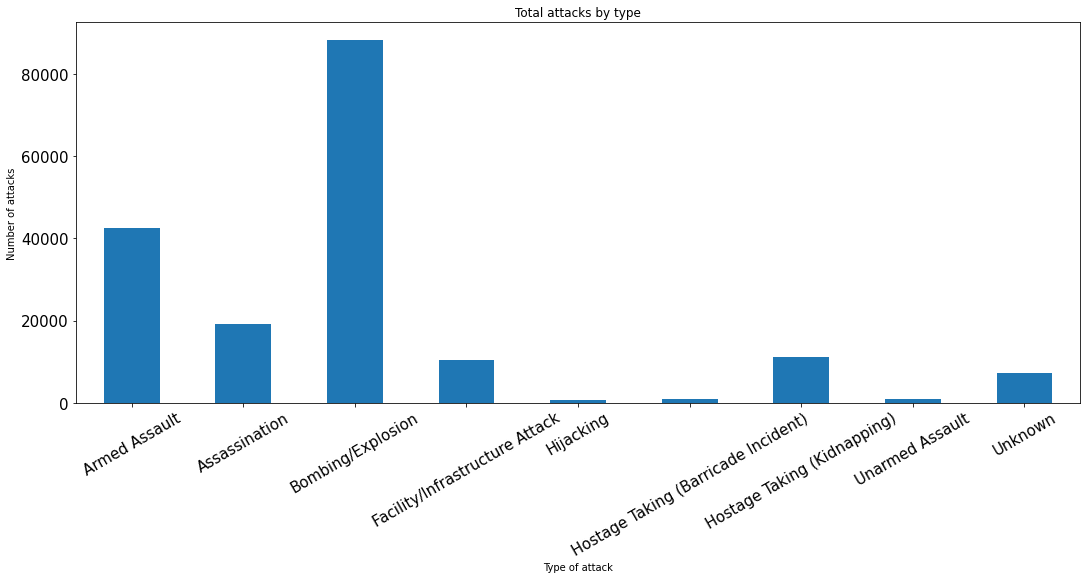

In [68]:
# Total attack by type of attack

new_df.groupby('attack_type')['attack_type'].count().plot.bar(xlabel='Type of attack',ylabel='Number of attacks',title='Total attacks by type',figsize=(18,7),rot=30,fontsize=15)


In [ ]:
new_df.head()

In [26]:
new_df.dropna(inplace=True)

In [27]:
new_df['people_killed'] = new_df['people_killed'].astype(int)

In [74]:
# City wise deaths
index_nill_death = new_df[(new_df['people_killed'] == 0)].index

city_df = new_df.drop(index_nill_death)


In [75]:
index_unknown_city = new_df[(new_df['city']=='Unknown')].index
city_df = new_df.drop(index_unknown_city)

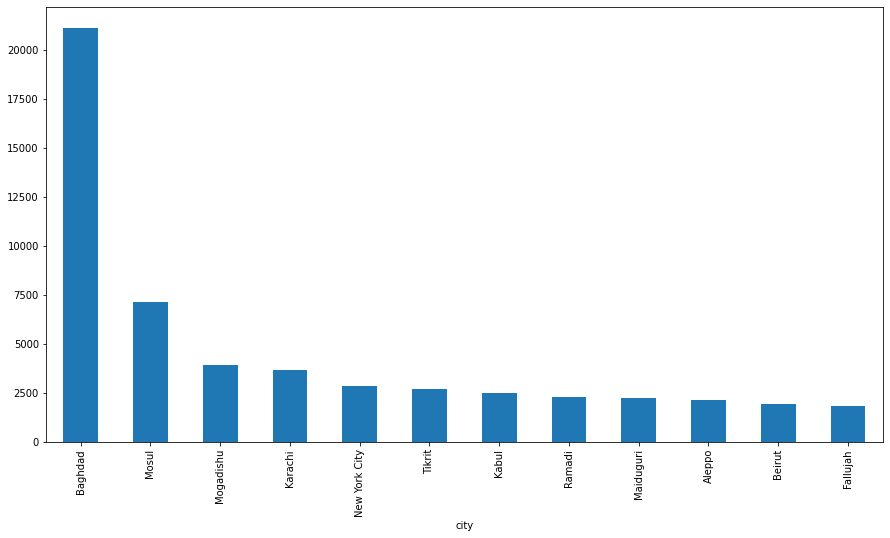

In [76]:
city_df.groupby('city')['people_killed'].sum().sort_values(ascending=False)[:12].plot.bar(figsize=(15,8))

In [30]:
# Terrorist activities by Groups

index_gang = new_df[(new_df['gang_name'] == 'Unknown')].index

gang_df = new_df.drop(index_gang)

In [31]:
gang_df.groupby('gang_name')['gang_name'].count()

gang_name
1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: gang_name, Length: 3534, dtype: int64

In [32]:
# Target type attacks
index_target = new_df[(new_df['target_type'] == 'Unknown')].index

target_df = new_df.drop(index_target)

target_df.groupby('target_type')['target_type'].count()

target_type
Abortion Related                    263
Airports & Aircraft                1341
Business                          20625
Educational Institution            4301
Food or Water Supply                315
Government (Diplomatic)            3569
Government (General)              21211
Journalists & Media                2947
Maritime                            351
Military                          27969
NGO                                 966
Other                               136
Police                            24471
Private Citizens & Property       43315
Religious Figures/Institutions     4431
Telecommunication                  1007
Terrorists/Non-State Militia       3038
Tourists                            440
Transportation                     6788
Utilities                          6015
Violent Political Party            1866
Name: target_type, dtype: int64

In [33]:
#Ransom collected country wise

new_df.groupby('country')['ransom'].sum()

country
Afghanistan    3.993795e+10
Albania        2.538024e+08
Algeria        8.622881e+09
Andorra        3.172530e+06
Angola         1.579920e+09
                   ...     
Yemen          1.060031e+10
Yugoslavia     6.440236e+08
Zaire          1.586265e+08
Zambia         1.966969e+08
Zimbabwe       3.204255e+08
Name: ransom, Length: 205, dtype: float64